In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("water_dataX.csv")

In [3]:
data.dtypes

STATION CODE                        object
LOCATIONS                           object
STATE                               object
Temp                                object
D.O. (mg/l)                         object
PH                                  object
CONDUCTIVITY (µmhos/cm)             object
B.O.D. (mg/l)                       object
NITRATENAN N+ NITRITENANN (mg/l)    object
FECAL COLIFORM (MPN/100ml)          object
TOTAL COLIFORM (MPN/100ml)Mean      object
year                                 int64
dtype: object

In [4]:
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes

STATION CODE                         object
LOCATIONS                            object
STATE                                object
Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)           object
TOTAL COLIFORM (MPN/100ml)Mean      float64
year                                  int64
dtype: object

In [5]:
start=2
end=1779
station=data.iloc [start:end ,0]
location=data.iloc [start:end ,1]
state=data.iloc [start:end ,2]
do= data.iloc [start:end ,4].astype(np.float64)
value=0
ph = data.iloc[ start:end,5]  
co = data.iloc [start:end ,6].astype(np.float64)   
  
year=data.iloc[start:end,11]
tc=data.iloc [2:end ,10].astype(np.float64)


bod = data.iloc [start:end ,7].astype(np.float64)
na= data.iloc [start:end ,8].astype(np.float64)
na.dtype

dtype('float64')

In [6]:
data.head()

STATION CODE                                          LOCATIONS  \
0         1393               DAMANGANGA AT D/S OF MADHUBAN, DAMAN   
1         1399  ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...   
2         1475                                ZUARI AT PANCHAWADI   
3         3181                        RIVER ZUARI AT BORIM BRIDGE   
4         3182                       RIVER ZUARI AT MARCAIM JETTY   

         STATE  Temp  D.O. (mg/l)   PH  CONDUCTIVITY (µmhos/cm)  \
0  DAMAN & DIU  30.6          6.7  7.5                    203.0   
1          GOA  29.8          5.7  7.2                    189.0   
2          GOA  29.5          6.3  6.9                    179.0   
3          GOA  29.7          5.8  6.9                     64.0   
4          GOA  29.5          5.8  7.3                     83.0   

   B.O.D. (mg/l)  NITRATENAN N+ NITRITENANN (mg/l) FECAL COLIFORM (MPN/100ml)  \
0            NaN                               0.1                         11   
1            2.0                               0.2                       4953   
2            1.7                               0.1                       3243   
3            3.8                               0.5                       5382   
4            1.9                               0.4                       3428   

   TOTAL COLIFORM (MPN/100ml)Mean  year  
0                            27.0  2014  
1                          8391.0  2014  
2                          5330.0  2014  
3                          8443.0  2014  
4                          5500.0  2014

In [7]:
data=pd.concat([station,location,state,do,ph,co,bod,na,tc,year],axis=1)
data. columns = ['station','location','state','do','ph','co','bod','na','tc','year']

In [8]:
data.head()

station                                location state   do   ph     co  bod  \
2    1475                     ZUARI AT PANCHAWADI   GOA  6.3  6.9  179.0  1.7   
3    3181             RIVER ZUARI AT BORIM BRIDGE   GOA  5.8  6.9   64.0  3.8   
4    3182            RIVER ZUARI AT MARCAIM JETTY   GOA  5.8  7.3   83.0  1.9   
5    1400  MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA   GOA  5.5  7.4   81.0  1.5   
6    1476          MANDOVI AT TONCA, MARCELA, GOA   GOA  6.1  6.7  308.0  1.4   

    na      tc  year  
2  0.1  5330.0  2014  
3  0.5  8443.0  2014  
4  0.4  5500.0  2014  
5  0.1  4049.0  2014  
6  0.3  5672.0  2014

Calculation of ph

In [9]:
data['npH']=data.ph.apply(lambda x: (100 if (8.5>=x>=7)  
                                 else(80 if  (8.6>=x>=8.5) or (6.9>=x>=6.8) 
                                      else(60 if (8.8>=x>=8.6) or (6.8>=x>=6.7) 
                                          else(40 if (9>=x>=8.8) or (6.7>=x>=6.5)
                                              else 0)))))

Calculation of do

In [10]:
data['ndo']=data.do.apply(lambda x:(100 if (x>=6)  
                                 else(80 if  (6>=x>=5.1) 
                                      else(60 if (5>=x>=4.1)
                                          else(40 if (4>=x>=3) 
                                              else 0)))))


Calculation of tc

In [11]:
data['ntc']=data.tc.apply(lambda x:(100 if (5>=x>=0)  
                                 else(80 if  (50>=x>=5) 
                                      else(60 if (500>=x>=50)
                                          else(40 if (10000>=x>=500) 
                                              else 0)))))

Calculation of bdo

In [12]:
data['nbdo']=data.bod.apply(lambda x:(100 if (3>=x>=0)  
                                 else(80 if  (6>=x>=3) 
                                      else(60 if (80>=x>=6)
                                          else(40 if (125>=x>=80) 
                                              else 0)))))

Calculation of Electrical Conductivity

In [13]:
data['nco']=data.co.apply(lambda x:(100 if (75>=x>=0)  
                                 else(80 if  (150>=x>=75) 
                                      else(60 if (225>=x>=150)
                                          else(40 if (300>=x>=225) 
                                              else 0)))))

Calculation of nitrate

In [14]:
data['nna']=data.na.apply(lambda x:(100 if (20>=x>=0)  
                                 else(80 if  (50>=x>=20) 
                                      else(60 if (100>=x>=50)
                                          else(40 if (200>=x>=100) 
                                              else 0)))))

In [15]:
data.head()

station                                location state   do   ph     co  bod  \
2    1475                     ZUARI AT PANCHAWADI   GOA  6.3  6.9  179.0  1.7   
3    3181             RIVER ZUARI AT BORIM BRIDGE   GOA  5.8  6.9   64.0  3.8   
4    3182            RIVER ZUARI AT MARCAIM JETTY   GOA  5.8  7.3   83.0  1.9   
5    1400  MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA   GOA  5.5  7.4   81.0  1.5   
6    1476          MANDOVI AT TONCA, MARCELA, GOA   GOA  6.1  6.7  308.0  1.4   

    na      tc  year  npH  ndo  ntc  nbdo  nco  nna  
2  0.1  5330.0  2014   80  100   40   100   60  100  
3  0.5  8443.0  2014   80   80   40    80  100  100  
4  0.4  5500.0  2014  100   80   40   100   80  100  
5  0.1  4049.0  2014  100   80   40   100   80  100  
6  0.3  5672.0  2014   60  100   40   100    0  100

In [16]:
data.dtypes

station      object
location     object
state        object
do          float64
ph          float64
co          float64
bod         float64
na          float64
tc          float64
year          int64
npH           int64
ndo           int64
ntc           int64
nbdo          int64
nco           int64
nna           int64
dtype: object

In [17]:
data['wph']=data.npH * 0.165
data['wdo']=data.ndo * 0.281
data['wbdo']=data.nbdo * 0.234
data['wco']=data.nco* 0.009
data['wna']=data.nna * 0.028
data['wtc']=data.ntc * 0.281
data['wqi']=data.wph+data.wdo+data.wbdo+data.wco+data.wna+data.wtc 

In [18]:
data.head()

station                                location state   do   ph     co  bod  \
2    1475                     ZUARI AT PANCHAWADI   GOA  6.3  6.9  179.0  1.7   
3    3181             RIVER ZUARI AT BORIM BRIDGE   GOA  5.8  6.9   64.0  3.8   
4    3182            RIVER ZUARI AT MARCAIM JETTY   GOA  5.8  7.3   83.0  1.9   
5    1400  MANDOVI AT NEGHBOURHOOD OF PANAJI, GOA   GOA  5.5  7.4   81.0  1.5   
6    1476          MANDOVI AT TONCA, MARCELA, GOA   GOA  6.1  6.7  308.0  1.4   

    na      tc  year  ...  nbdo  nco  nna   wph    wdo   wbdo   wco  wna  \
2  0.1  5330.0  2014  ...   100   60  100  13.2  28.10  23.40  0.54  2.8   
3  0.5  8443.0  2014  ...    80  100  100  13.2  22.48  18.72  0.90  2.8   
4  0.4  5500.0  2014  ...   100   80  100  16.5  22.48  23.40  0.72  2.8   
5  0.1  4049.0  2014  ...   100   80  100  16.5  22.48  23.40  0.72  2.8   
6  0.3  5672.0  2014  ...   100    0  100   9.9  28.10  23.40  0.00  2.8   

     wtc    wqi  
2  11.24  79.28  
3  11.24  69.34  
4  11.24  77.14  
5  11.24  77.14  
6  11.24  75.44  

[5 rows x 23 columns]

In [19]:
ag = data.groupby('year')['wqi'].mean()

In [20]:
ag

year
2006    71.308824
2007    72.549000
2008    72.570943
2009    74.085193
2010    74.648723
2011    75.647013
2012    78.969041
2013    75.009425
2014    76.879588
Name: wqi, dtype: float64

In [21]:
data = ag.reset_index(level=0,inplace=False)

In [22]:
data

year        wqi
0  2006  71.308824
1  2007  72.549000
2  2008  72.570943
3  2009  74.085193
4  2010  74.648723
5  2011  75.647013
6  2012  78.969041
7  2013  75.009425
8  2014  76.879588

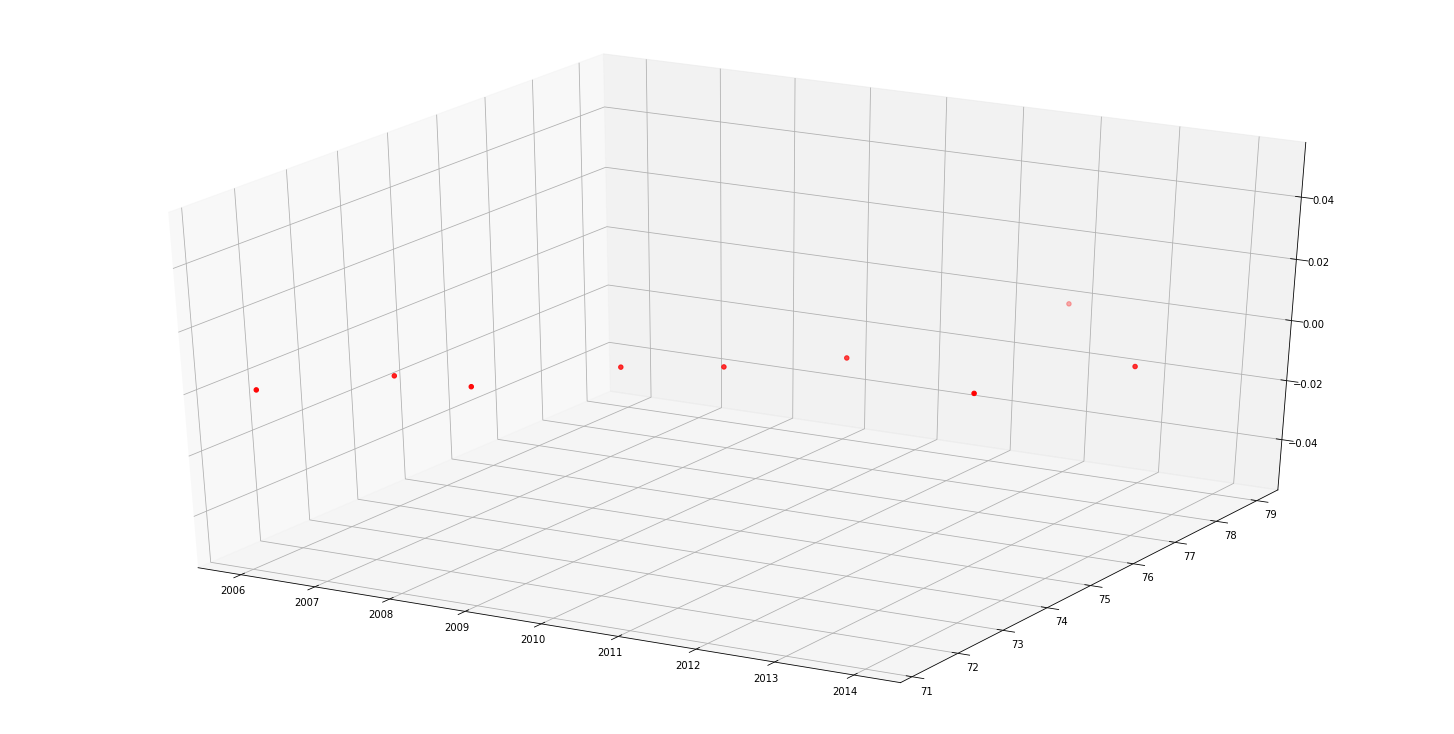

year        wqi
0  2006  71.308824
1  2007  72.549000
2  2008  72.570943
3  2009  74.085193
4  2010  74.648723
5  2011  75.647013
6  2012  78.969041
7  2013  75.009425
8  2014  76.879588

In [23]:
year=data['year'].values
AQI=data['wqi'].values
data['wqi']=pd.to_numeric(data['wqi'],errors='coerce')
data['year']=pd.to_numeric(data['year'],errors='coerce')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(year,AQI, color='red')
plt.show()
data

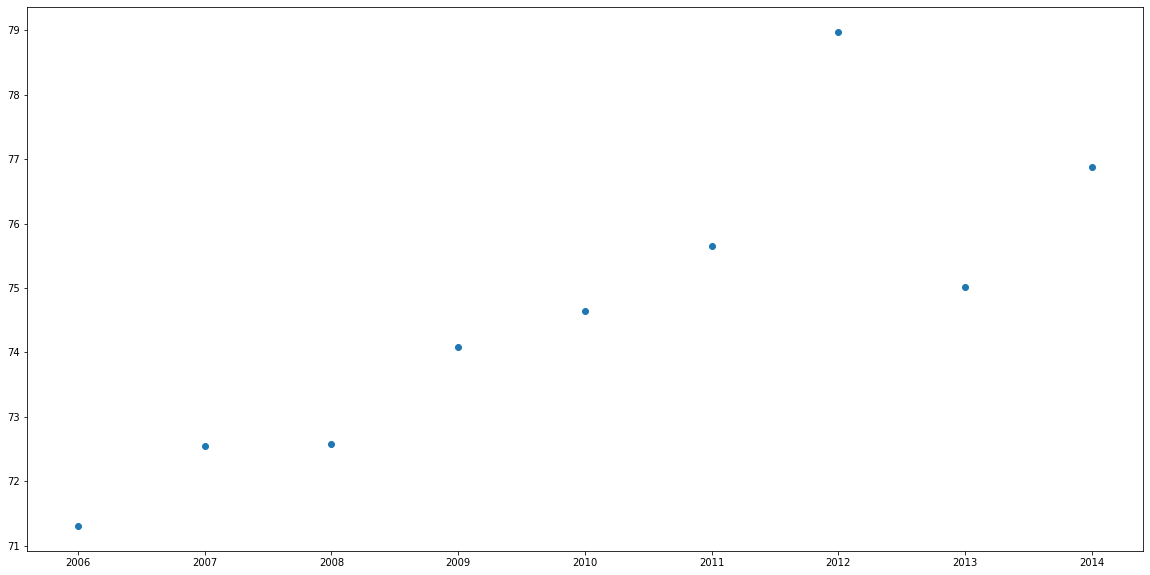

In [24]:
cols =['year']
y = data['wqi']
x=data[cols]

plt.scatter(x,y)
plt.show()

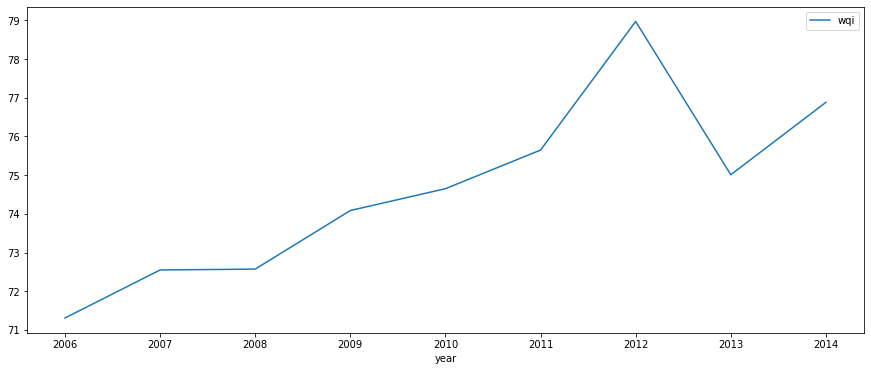

In [25]:
import matplotlib.pyplot as plt
data=data.set_index('year')
data.plot(figsize=(15,6))
plt.show()

In [26]:
from sklearn import neighbors,datasets
data=data.reset_index(level=0,inplace=False)
data

year        wqi
0  2006  71.308824
1  2007  72.549000
2  2008  72.570943
3  2009  74.085193
4  2010  74.648723
5  2011  75.647013
6  2012  78.969041
7  2013  75.009425
8  2014  76.879588

In [27]:
x = data.iloc[:,0:1].values
y = data.iloc[:,1:2].values

In [28]:
x

array([[2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014]], dtype=int64)

In [29]:
y

array([[71.30882353],
       [72.549     ],
       [72.5709434 ],
       [74.08519337],
       [74.6487234 ],
       [75.64701299],
       [78.9690411 ],
       [75.00942529],
       [76.87958848]])

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 4)

In [31]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = reg.predict(x_test)

In [33]:
y_pred

array([[73.86206246],
       [74.59948715]])

In [34]:
y_test

array([[74.08519337],
       [74.6487234 ]])

In [35]:
from sklearn.metrics import mean_squared_error
print('mse:%.2f'%mean_squared_error(y_test,y_pred))

mse:0.03


In [36]:
from sklearn.metrics import r2_score 
accuracy = r2_score(y_test,y_pred)
accuracy

0.6711764203417885

In [37]:
import pickle
pickle.dump(reg,open('water_quality.pkl','wb'))